# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#weather check on each city using API calls

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_name = []
city_number = []
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



# Loop through the list of cities and perform a request for data on each


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(city)
    except:
        print("City Not Found")


print(f"The city name is: {city_name}")
print(f"The latitude is: {lat}")
print(f"The longitude is: {lng}")
print(f"The temperature is: {temp}")
print(f"The latitude is: {lat}")
print(f"The max temperature is: {max_temp}")
print(f"The humidity is: {humidity}")
print(f"The cloudiness is: {cloudiness}")
print(f"The wind speed is: {wind_speed}")
print(f"The country is: {country}")
print(f"The date is: {date}")






dikson
busselton
kushima
huarmey
ushuaia
City Not Found
severo-kurilsk
qandala
punta arenas
City Not Found
bengkulu
albany
bathsheba
arraial do cabo
college
rikitea
ahome
upernavik
paamiut
havre-saint-pierre
nikolskoye
City Not Found
seoul
hermanus
hilo
okha
cape town
chuy
half moon bay
praia da vitoria
ilulissat
longyearbyen
dindori
jamestown
padang
City Not Found
east london
butaritari
kapaa
vila velha
puerto ayora
bethel
chokurdakh
ribeira grande
martapura
City Not Found
City Not Found
mar del plata
zhongshu
vernon
natal
kitui
hithadhoo
bambous virieux
bluff
hokitika
palmer
faya
mahebourg
City Not Found
yumen
manta
balasheyka
port antonio
viedma
City Not Found
severnyy
City Not Found
samarai
tura
norman wells
mathbaria
te anau
barrow
zaraza
macieira de cambra
port alfred
mehamn
dingle
ayame
City Not Found
vaini
hamilton
zlocieniec
muros
hualmay
tasiilaq
sabang
arman
City Not Found
segezha
kailua
horodok
qaanaaq
saint-pierre
City Not Found
yulara
katobu
narsaq
smithers
svetlyy
pangni

In [4]:
print(len(city_name))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

569
569
569
569
569
569
569
569
569
569


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_data = pd.DataFrame({
                            "City": city_name,
                            "Lat": lat,
                            "Lng": lng,
                            "Temp": temp,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date
                            })



city_weather_data.to_csv(r'../output_data/cities1.csv')
city_weather_data

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,16.86,16.86,95,46,5.46,RU,1621967783
1,busselton,-33.6500,115.3333,47.05,47.05,77,100,8.70,AU,1621967783
2,kushima,31.4583,131.2333,65.12,65.12,83,100,5.73,JP,1621967784
3,huarmey,-10.0681,-78.1522,71.87,71.87,71,7,9.31,PE,1621967784
4,ushuaia,-54.8000,-68.3000,31.66,31.66,80,90,21.85,AR,1621967785
...,...,...,...,...,...,...,...,...,...,...
564,les herbiers,46.8667,-1.0167,55.60,55.99,78,95,12.84,FR,1621968016
565,liwale,-9.7667,37.9333,62.44,62.44,70,8,4.72,TZ,1621968016
566,loa janan,-0.5830,117.0950,74.01,74.01,97,99,1.25,ID,1621968017
567,borogontsy,62.6683,131.1683,44.15,44.15,81,28,1.88,RU,1621968017


In [6]:
city_weather_data.describe()

,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.563933,23.313572,65.007311,65.742478,67.866432,55.625659,8.337329,1.621968e+09
std,32.983871,90.570343,17.099333,17.333461,21.991109,40.364128,6.021511,9.051455e+01
min,-54.800000,-175.200000,16.860000,16.860000,5.000000,0.000000,0.000000,1.621967e+09
25%,-5.383300,-56.154900,53.060000,53.670000,56.000000,12.000000,3.780000,1.621968e+09
50%,26.588100,29.116400,67.330000,68.450000,72.000000,68.000000,6.910000,1.621968e+09
75%,49.750200,102.500000,78.690000,78.980000,85.000000,100.000000,11.360000,1.621968e+09
max,78.218600,179.316700,105.800000,105.800000,100.000000,100.000000,46.480000,1.621968e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
high_humidity = city_weather_data[city_weather_data['Humidity'] > 100]

len(high_humidity)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.
#NONE IN DATAFRAME. SKIPPING.

# set up lists to hold reponse info


# Loop through the list of cities and perform a request for data on each


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
city_weather_data



,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,16.86,16.86,95,46,5.46,RU,1621967783
1,busselton,-33.6500,115.3333,47.05,47.05,77,100,8.70,AU,1621967783
2,kushima,31.4583,131.2333,65.12,65.12,83,100,5.73,JP,1621967784
3,huarmey,-10.0681,-78.1522,71.87,71.87,71,7,9.31,PE,1621967784
4,ushuaia,-54.8000,-68.3000,31.66,31.66,80,90,21.85,AR,1621967785
...,...,...,...,...,...,...,...,...,...,...
564,les herbiers,46.8667,-1.0167,55.60,55.99,78,95,12.84,FR,1621968016
565,liwale,-9.7667,37.9333,62.44,62.44,70,8,4.72,TZ,1621968016
566,loa janan,-0.5830,117.0950,74.01,74.01,97,99,1.25,ID,1621968017
567,borogontsy,62.6683,131.1683,44.15,44.15,81,28,1.88,RU,1621968017


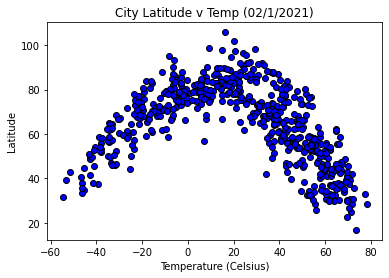

In [11]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")


plt.title("City Latitude v Temp (02/1/2021)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Latitude")
plt.savefig("../Images/Lat_Temp.png")
plt.show()



## Latitude vs. Humidity Plot

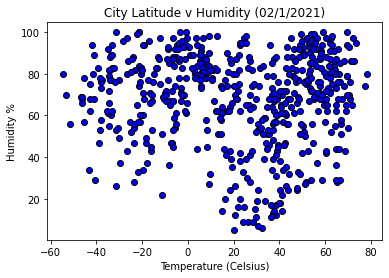

In [12]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")


plt.title("City Latitude v Humidity (02/1/2021)")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Humidity %")
plt.savefig("../Images/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

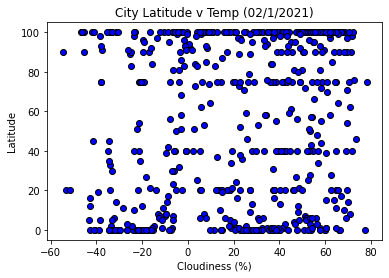

In [13]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")


plt.title("City Latitude v Temp (02/1/2021)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig("../Images/Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

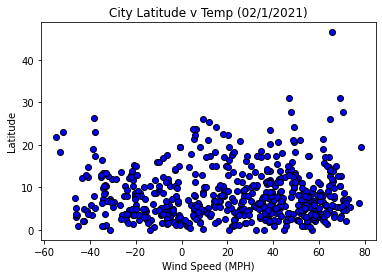

In [14]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")


plt.title("City Latitude v Temp (02/1/2021)")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")
plt.savefig("../Images/Lat_Windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
city_weather_data['Humidity'] = city_weather_data['Humidity'].astype(int)
city_weather_data['Lat'] = city_weather_data['Lat'].astype(int)

city_weather_data.dtypes

#Create Northern and Southern Hemsiphere Dataframes
northern_hemisphere_df = city_weather_data[city_weather_data['Lat'] > 0]
southern_hemisphere_df = city_weather_data[city_weather_data['Lat'] < 0]
southern_hemisphere_df

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,busselton,-33,115.3333,47.05,47.05,77,100,8.70,AU,1621967783
3,huarmey,-10,-78.1522,71.87,71.87,71,7,9.31,PE,1621967784
4,ushuaia,-54,-68.3000,31.66,31.66,80,90,21.85,AR,1621967785
7,punta arenas,-53,-70.9167,39.22,39.31,70,20,18.21,CL,1621967786
8,bengkulu,-3,102.2655,77.25,77.25,86,32,3.87,ID,1621967787
...,...,...,...,...,...,...,...,...,...,...
550,takaka,-40,172.8000,45.52,45.55,68,0,3.71,NZ,1621968010
552,pandamatenga,-18,25.6270,59.34,59.34,49,0,3.56,BW,1621968011
553,luziania,-16,-47.9503,83.89,83.89,45,92,3.15,BR,1621968012
557,tsaratanana,-16,47.6500,68.83,68.83,66,21,4.99,MG,1621968013


The r-squared is: 0.621480423101796


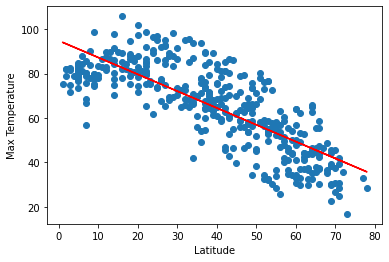

In [16]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("../Images/Lat_MaxTemp_Regression.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.698106784849679


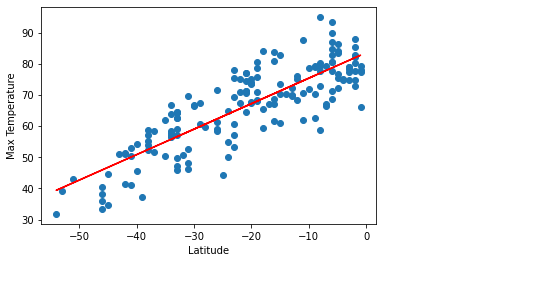

In [17]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("../Images/Lat_MaxTemp_Regression_SH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010781859531358195


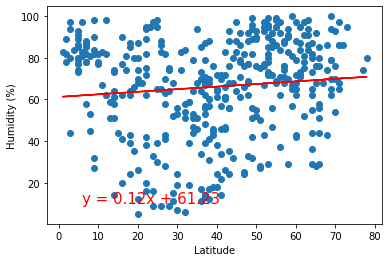

In [18]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/Lat_Humidity_RegressionNH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01466941175361902


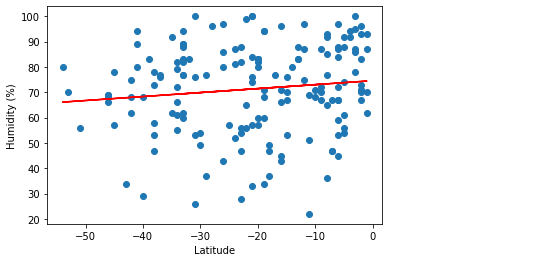

In [19]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../Images/Lat_Humidity_RegressionSH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019340213433411226


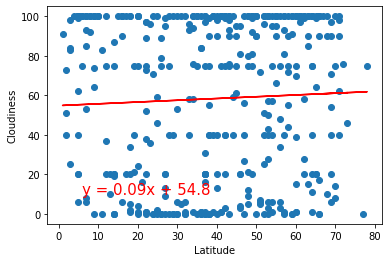

In [20]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Images/Lat_Cloudiness_RegressionNH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006106665799727199


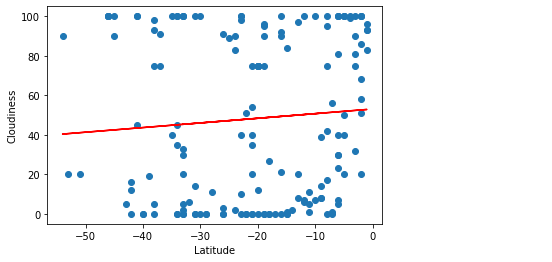

In [21]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("../Images/Lat_Cloudiness_RegressionSH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.022786747814122e-05


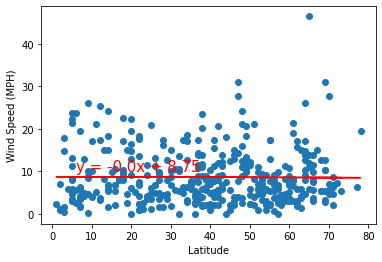

In [22]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("../Images/Lat_WindSpeed_RegressionNH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.056466343364852255


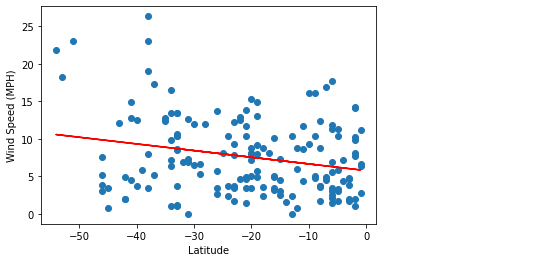

In [23]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig("../Images/Lat_WindSpeed_RegressionSH.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()